# ✅ IMDB Movies Analysis 📽️✨

## 📌 Objective
Analyze IMDB movies dataset to discover patterns and relationships between:
- Genres
- IMDB Ratings
- Number of Votes
- Runtime
- Production Years

---

##  Data Cleaning
- Removed null values.
- Dropped duplicate rows (by movie ID).
- Filtered out movies with low votes for more reliable insights.

---

##  Data Exploration
- Count of movies by Genre.
- Average ratings and votes by Genre.
- Production trends over the years.
- Relationship between Runtime and IMDB Rating.
- Correlation matrix to confirm numeric relationships.

---

##  Key Findings
- Most popular genres: (e.g., Action, Drama, Comedy, etc.)
- Highest production years: [2008,2009]
- Weak correlation (0.23) between Runtime and Rating.
- Some genres consistently receive higher ratings than others.

---

## Conclusion
The movie runtime does not strongly affect its IMDB rating.
Genres have a noticeable impact.
Production increased in specific years.
The data reveals clear trends that can support filmmakers and decision-makers.

---
*Project by:*:Mostafa Nagi  





## lib

In [3]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading csv file

In [6]:
df=pd.read_csv("movies_initial.csv")

In [7]:
df.head(1)

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie


In [8]:
df["imdbID"].isnull().sum()

0

In [9]:
df.duplicated(subset="imdbID").sum()

1517

In [10]:
df["imdbID"].duplicated().sum()

1517

In [11]:
df["imdbID"].count()

46014

In [12]:
df.drop_duplicates(subset="imdbID",inplace=True)

In [13]:
df["imdbID"].count()

44497

In [14]:
round(df["imdbVotes"].mean())

11715

In [15]:
df.shape

(44497, 21)

In [16]:
df=df[df["imdbVotes"]>4000]

In [17]:
df.shape

(10385, 21)

In [18]:
df["type"].value_counts()

type
movie     10269
series      116
Name: count, dtype: int64

In [19]:
mask_movies= df["type"]=="movie"
df_movies=df[mask_movies]
df_movies["imdbID"].count()

10269

In [20]:
mask_series=df["type"]=="series"
df_series=df[mask_series]
df_series["imdbID"].count()

116

In [21]:
df_movies["genre"].head(3)

5            Documentary, Short
25    Short, Adventure, Fantasy
28               Short, Western
Name: genre, dtype: object

In [22]:
df_movies.loc[:, "genre"] = df_movies["genre"].str.split(",")

In [23]:
df_movies["genre"].head(2)

5             [Documentary,  Short]
25    [Short,  Adventure,  Fantasy]
Name: genre, dtype: object

In [24]:
exploded_data_movies=df_movies.explode("genre")

In [25]:
exploded_data_movies.head(10)

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
5,12,The Arrival of a Train,1896,NaN,1 min,Documentary,1896-01-01,"Auguste Lumi�re, Louis Lumi�re",NaN,NaN,...,7.3,5043.0,https://m.media-amazon.com/images/M/MV5BMjEyND...,A group of people are standing in a straight l...,A group of people are standing in a straight l...,NaN,France,NaN,2015-08-15 00:02:53.443000000,movie
5,12,The Arrival of a Train,1896,NaN,1 min,Short,1896-01-01,"Auguste Lumi�re, Louis Lumi�re",NaN,NaN,...,7.3,5043.0,https://m.media-amazon.com/images/M/MV5BMjEyND...,A group of people are standing in a straight l...,A group of people are standing in a straight l...,NaN,France,NaN,2015-08-15 00:02:53.443000000,movie
25,417,A Trip to the Moon,1902,TV-G,13 min,Short,1902-10-04,Georges M�li�s,NaN,"Fran�ois Lallement, Jules-Eug�ne Legris",...,8.2,23904.0,https://m.media-amazon.com/images/M/MV5BMTQzMD...,A group of astronomers go on an expedition to ...,A group of men travel to the moon by being sho...,NaN,France,NaN,2015-09-01 00:16:55.443000000,movie
25,417,A Trip to the Moon,1902,TV-G,13 min,Adventure,1902-10-04,Georges M�li�s,NaN,"Fran�ois Lallement, Jules-Eug�ne Legris",...,8.2,23904.0,https://m.media-amazon.com/images/M/MV5BMTQzMD...,A group of astronomers go on an expedition to ...,A group of men travel to the moon by being sho...,NaN,France,NaN,2015-09-01 00:16:55.443000000,movie
25,417,A Trip to the Moon,1902,TV-G,13 min,Fantasy,1902-10-04,Georges M�li�s,NaN,"Fran�ois Lallement, Jules-Eug�ne Legris",...,8.2,23904.0,https://m.media-amazon.com/images/M/MV5BMTQzMD...,A group of astronomers go on an expedition to ...,A group of men travel to the moon by being sho...,NaN,France,NaN,2015-09-01 00:16:55.443000000,movie
28,439,The Great Train Robbery,1903,TV-G,11 min,Short,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
28,439,The Great Train Robbery,1903,TV-G,11 min,Western,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
106,4972,The Birth of a Nation,1915,NOT RATED,165 min,Drama,1915-03-03,D.W. Griffith,"Thomas Dixon Jr. (adapted from his novel: ""The...","Lillian Gish, Mae Marsh, Henry B. Walthall, Mi...",...,6.8,15715.0,https://m.media-amazon.com/images/M/MV5BMTY0OD...,The Civil War divides friends and destroys fam...,"Two brothers, Phil and Ted Stoneman, visit the...",NaN,USA,2 wins.,2015-09-11 00:32:27.763000000,movie
106,4972,The Birth of a Nation,1915,NOT RATED,165 min,History,1915-03-03,D.W. Griffith,"Thomas Dixon Jr. (adapted from his novel: ""The...","Lillian Gish, Mae Marsh, Henry B. Walthall, Mi...",...,6.8,15715.0,https://m.media-amazon.com/images/M/MV5BMTY0OD...,The Civil War divides friends and destroys fam...,"Two brothers, Phil and Ted Stoneman, visit the...",NaN,USA,2 wins.,2015-09-11 00:32:27.763000000,movie
106,4972,The Birth of a Nation,1915,NOT RATED,165 min,Romance,1915-03-03,D.W. Griffith,"Thomas Dixon Jr. (adapted from his novel: ""The...","Lillian Gish, Mae Marsh, Henry B. Walthall, Mi...",...,6.8,15715.0,https://m.media-amazon.com/images/M/MV5BMTY0OD...,The Civil War divides friends and destroys fam...,"Two brothers, Phil and Ted Stoneman, visit the...",NaN,USA,2 wins.,2015-09-11 00:32:27.763000000,movie


In [26]:
exploded_data_movies["genre"]=exploded_data_movies["genre"].str.strip()

In [27]:
grouped_movies_votesAVG=exploded_data_movies.groupby("genre")["imdbVotes"].mean()

In [28]:
grouped_movies_votesAVG

genre
Action         67277.347549
Adventure      81247.405828
Animation      53101.768482
Biography      50133.075875
Comedy         36354.906481
Crime          48064.348296
Documentary    12653.950192
Drama          40088.364797
Family         42730.677258
Fantasy        75286.150538
Film-Noir      18829.975000
History        37769.247734
Horror         32071.987542
Music          24983.430818
Musical        27054.045977
Mystery        52981.497537
Romance        35518.563043
Sci-Fi         87276.015471
Short           8847.770115
Sport          36790.288136
Thriller       53167.488095
War            42485.084459
Western        35670.751773
Name: imdbVotes, dtype: float64

In [29]:
grouped_movies_votesAVG.sort_values(ascending=False,inplace=True)

In [30]:
grouped_movies_ratingAVG=exploded_data_movies.groupby("genre")["imdbRating"].mean()

In [31]:
grouped_movies_ratingAVG.sort_values(ascending=False,inplace=True)

In [32]:
grouped_movies_ratingAVG

genre
Short          7.733333
Film-Noir      7.723750
Documentary    7.512644
War            7.328041
History        7.296375
Biography      7.242218
Western        7.071631
Animation      7.000778
Drama          6.940700
Musical        6.855747
Music          6.792453
Crime          6.692807
Romance        6.686522
Sport          6.615254
Mystery        6.570197
Adventure      6.495593
Comedy         6.404926
Thriller       6.397321
Fantasy        6.378187
Action         6.310588
Family         6.288462
Sci-Fi         6.196765
Horror         5.882641
Name: imdbRating, dtype: float64

In [33]:
import matplotlib.pyplot as plt

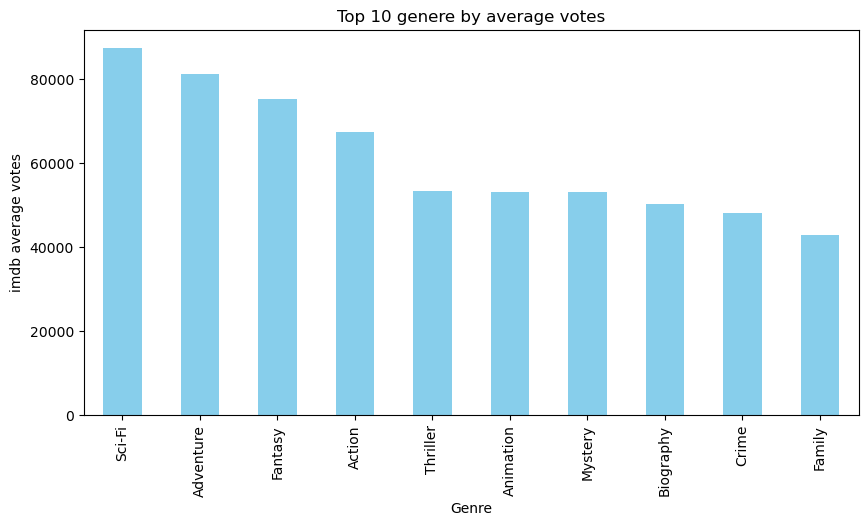

In [136]:

# Always aresh figure — good practice
plt.figure(figsize=(10, 5))

# Plot: bar plot, red color
grouped_movies_votesAVG.head(10).plot(kind="bar", color="skyblue")

#
import matplotlib.pyplot as plt

# Take the top 10

# Make the bar plot
plt.xlabel("Genre")
plt.ylabel("imdb average votes")
plt.title("Top 10 genere by average votes")
plt.show()

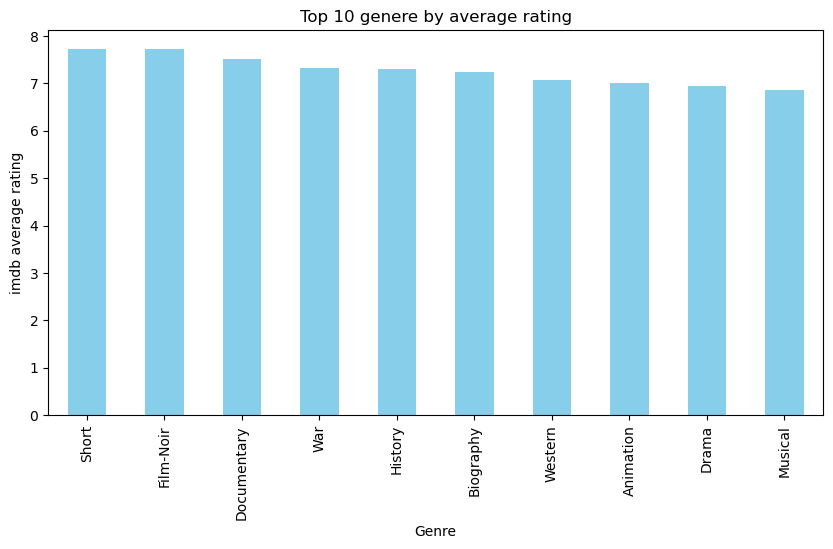

In [138]:
plt.figure(figsize=(10, 5))

# Plot: bar plot, red color
grouped_movies_ratingAVG.head(10).plot(kind="bar", color="skyblue")

#
import matplotlib.pyplot as plt

# Take the top 10

# Make the bar plot
plt.xlabel("Genre")
plt.ylabel("imdb average rating")
plt.title("Top 10 genere by average rating")
plt.show()

In [36]:
exploded_data_movies.dropna(subset="runtime",inplace=True)

In [37]:
exploded_data_movies["runtime"].dtype

dtype('O')

In [38]:
exploded_data_movies["runtime"]=exploded_data_movies["runtime"].str.replace("min"," ").str.strip().astype(float)

In [39]:
exploded_data_movies["runtime"].describe()

count    24910.000000
mean       106.623083
std         24.568798
min          1.000000
25%         93.000000
50%        103.000000
75%        117.000000
max        583.000000
Name: runtime, dtype: float64

In [40]:
exploded_data_movies = exploded_data_movies[ exploded_data_movies["runtime"] != exploded_data_movies["runtime"].max()]

In [41]:
exploded_data_movies["runtime"].describe()

count    24907.000000
mean       106.565704
std         24.007505
min          1.000000
25%         93.000000
50%        103.000000
75%        117.000000
max        450.000000
Name: runtime, dtype: float64

In [42]:
grouped_movies_runtime=exploded_data_movies.groupby("genre")["runtime"].mean()

In [43]:
type(grouped_movies_runtime)

pandas.core.series.Series

In [44]:
grouped_movies_runtime.sort_values(inplace=True,ascending=False)

In [45]:
##grouped_movies_runtime=pd.DataFrame(grouped_movies_runtime)

In [46]:
grouped_movies_runtime

genre
History        131.042296
Biography      121.295720
War            121.077703
Musical        120.448276
Western        113.163121
Drama          112.559489
Romance        109.833333
Music          109.311321
Sport          108.601695
Action         108.469518
Adventure      107.688478
Crime          107.608884
Mystery        106.778325
Thriller       105.483313
Fantasy        105.024578
Sci-Fi         102.385373
Comedy         100.970930
Documentary     99.011494
Family          96.624791
Film-Noir       96.100000
Horror          95.716777
Animation       79.470817
Short           16.172414
Name: runtime, dtype: float64

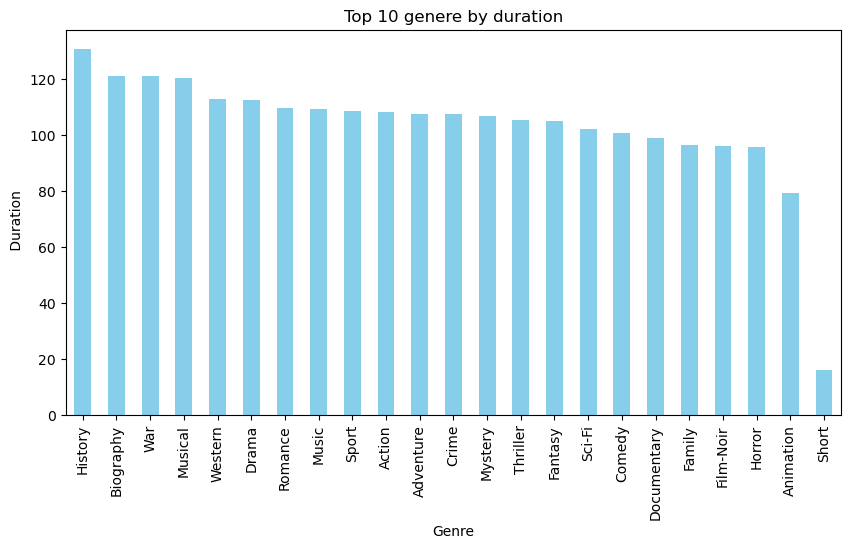

In [47]:
plt.figure(figsize=(10, 5))

# Plot: bar plot, red color
grouped_movies_runtime.plot(kind="bar", color="skyblue")


#
import matplotlib.pyplot as plt

# Take the top 10

# Make the bar plot
plt.xlabel("Genre")
plt.ylabel(" Duration")
plt.title("Top 10 genere by duration")
plt.show()

## movies for each year

In [49]:
df_movies["year"].isnull().sum()

0

In [50]:
grouped_movies_count_years=df_movies.groupby("year")["imdbID"].count()

In [51]:
grouped_movies_count_years.dtype

dtype('int64')

In [52]:
grouped_movies_count_years.sort_values(ascending=False,inplace=True)

In [53]:
grouped_movies_count_years

year
2009    444
2008    444
2011    433
2013    432
2010    426
       ... 
1917      1
1916      1
1915      1
1903      1
1896      1
Name: imdbID, Length: 104, dtype: int64

Text(0.5, 1.0, 'movies prodution through years')

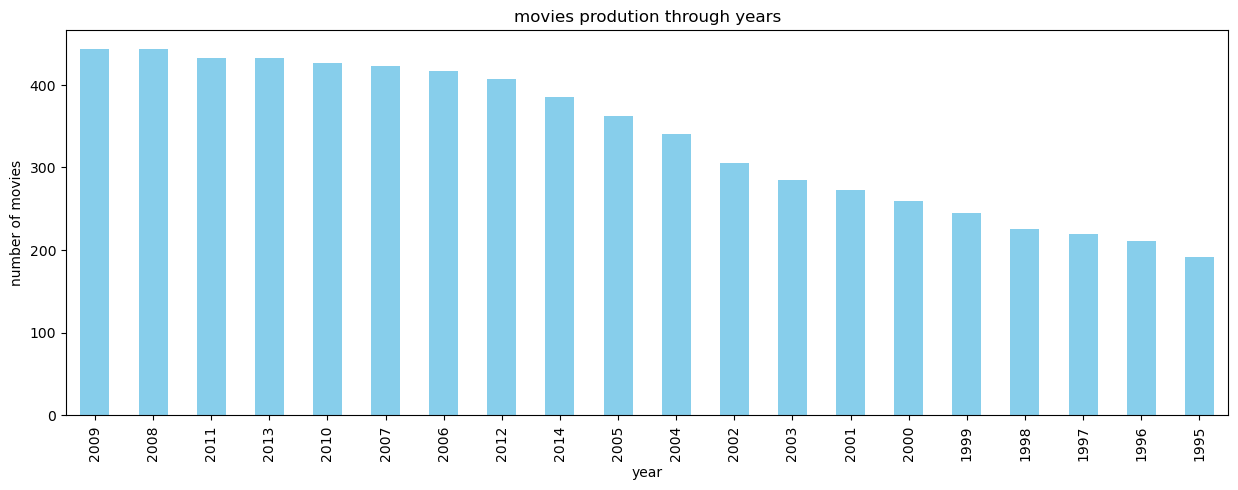

In [144]:

plt.figure(figsize=(15,5))
grouped_movies_count_years.head(20).plot(kind="bar",color="skyblue")
plt.xlabel("year")
plt.ylabel("number of movies")
plt.title("movies prodution through years")

Text(0.5, 1.0, 'movies prodution through years')

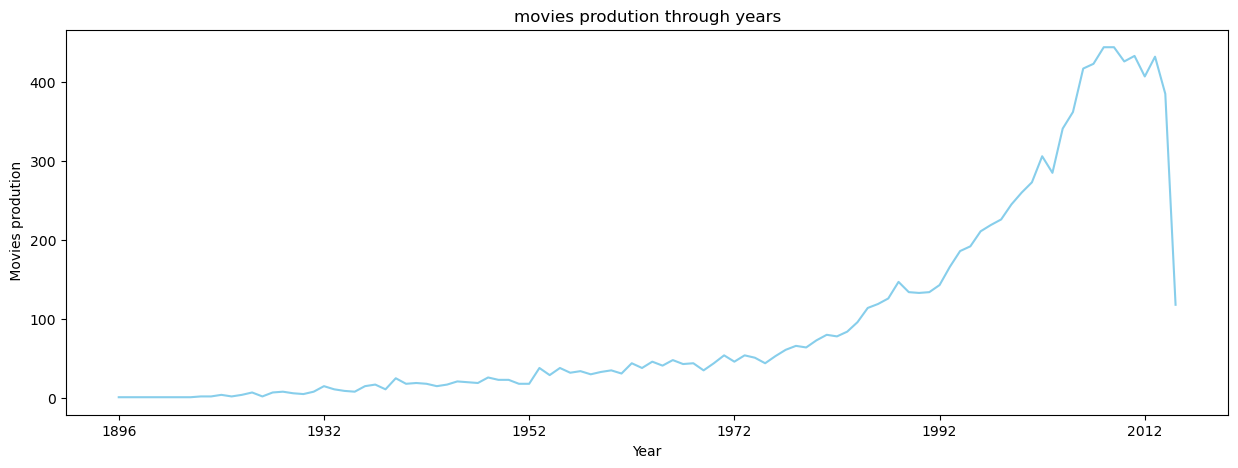

In [142]:
plt.figure(figsize=(15,5))
grouped_movies_count_years.sort_index().plot(kind="line",color="skyblue")
plt.xlabel("Year")
plt.ylabel(" Movies prodution")
plt.title("movies prodution through years")

## 2009,2008 were the years with the most prodution rate  with 444 movies

In [57]:
average_rating_movies_years=df_movies.groupby("year")["imdbRating"].mean().sort_values(ascending=False)

In [58]:
average_rating_movies_years

year
1921    8.250000
1902    8.200000
1926    8.150000
1923    8.100000
1924    8.100000
          ...   
2008    6.405856
1994    6.401613
2009    6.395721
2011    6.387067
1996    6.323697
Name: imdbRating, Length: 104, dtype: float64

Text(0.5, 1.0, 'movies rating through years')

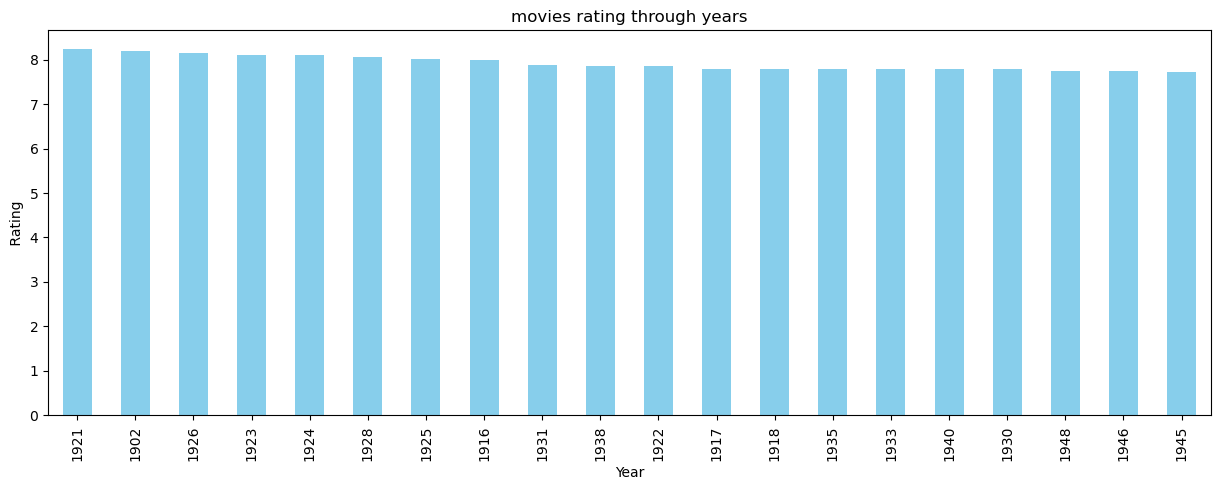

In [140]:
plt.figure(figsize=(15,5))
average_rating_movies_years.head(20).plot(kind="bar",color="skyblue")
plt.xlabel("Year")
plt.ylabel(" Rating ")
plt.title("movies rating through years")

## df of rating and count with years

In [61]:
df_rating=average_rating_movies_years.to_frame(name="Avg Rating")
df_counts=grouped_movies_count_years.to_frame(name="count of movies")

In [62]:
df_rating

,Avg Rating
year,
1921,8.250000
1902,8.200000
1926,8.150000
1923,8.100000
1924,8.100000
...,...
2008,6.405856
1994,6.401613
2009,6.395721


## inner  joins to df of rating and count with years

In [64]:
combined = df_counts.join( df_rating, how="inner")

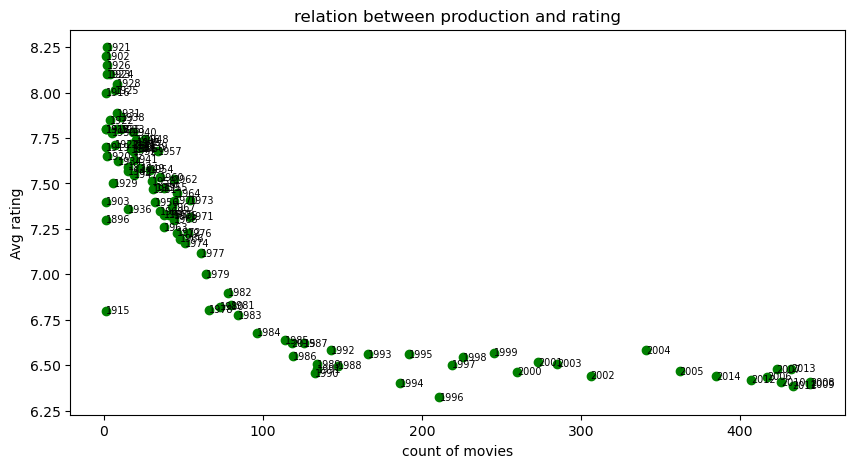

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(combined["count of movies"],combined["Avg Rating"],color="green")
plt.xlabel("count of movies")
plt.ylabel("Avg rating")
plt.title("relation between production and rating")
for i in combined.index:
    x = combined.loc[i, "count of movies"]
    y = combined.loc[i, "Avg Rating"]
    plt.text(x, y, str(i), fontsize=7, ha='left', va='center')

## finding the realtion between the genre and the years

genre  Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
year                                                                         
1896      0.0        0.0        0.0        0.0     0.0    0.0          1.0   
1902      0.0        1.0        0.0        0.0     0.0    0.0          0.0   
1903      0.0        0.0        0.0        0.0     0.0    0.0          0.0   
1915      0.0        0.0        0.0        0.0     0.0    0.0          0.0   
1916      0.0        0.0        0.0        0.0     0.0    0.0          0.0   

genre  Drama  Family  Fantasy  ...  Music  Musical  Mystery  Romance  Sci-Fi  \
year                           ...                                             
1896     0.0     0.0      0.0  ...    0.0      0.0      0.0      0.0     0.0   
1902     0.0     0.0      1.0  ...    0.0      0.0      0.0      0.0     0.0   
1903     0.0     0.0      0.0  ...    0.0      0.0      0.0      0.0     0.0   
1915     1.0     0.0      0.0  ...    0.0      0.0   

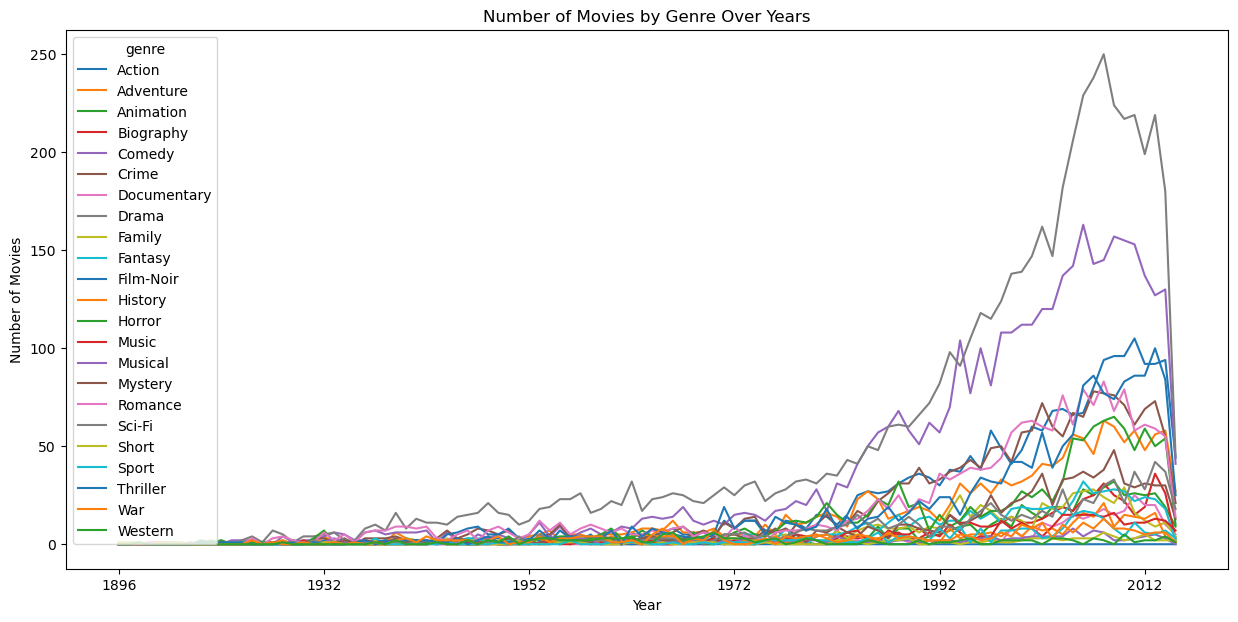

In [67]:

grouped = exploded_data_movies.groupby(["year", "genre"]).size()


grouped = grouped.reset_index(name="count")


pivot = grouped.pivot(index="year", columns="genre", values="count")


pivot.fillna(0, inplace=True)


print(pivot.head())


pivot.plot(figsize=(15, 7))


import matplotlib.pyplot as plt
plt.title("Number of Movies by Genre Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


In [68]:
run_time_rating=exploded_data_movies.dropna(subset=["runtime","imdbRating"])

Text(0.5, 1.0, 'relation between production and rating')

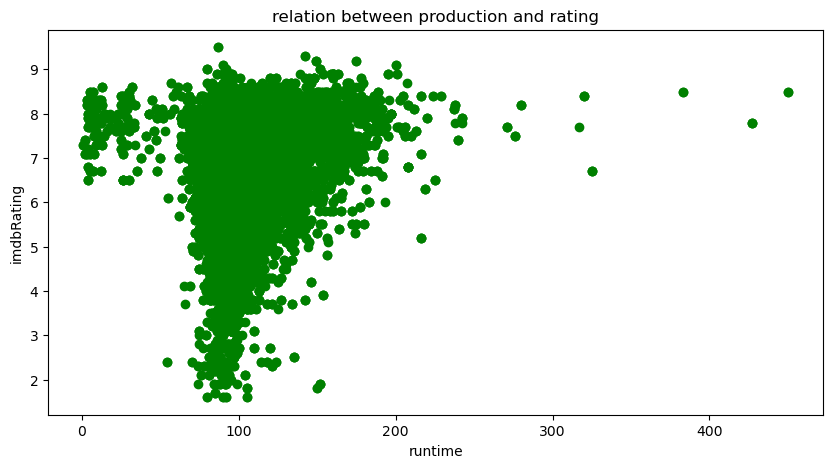

In [69]:

plt.figure(figsize=(10,5))
plt.scatter(run_time_rating["runtime"],run_time_rating["imdbRating"],color="green")
plt.xlabel("runtime")
plt.ylabel("imdbRating")
plt.title("relation between production and rating")

In [70]:
run_time_rating[["runtime", "imdbRating"]].corr()

,runtime,imdbRating
runtime,1.000000,0.233798
imdbRating,0.233798,1.000000
